In [1]:
from utils import *

# Experiment 1
## Compare Splines and NW_estimator with changing param h

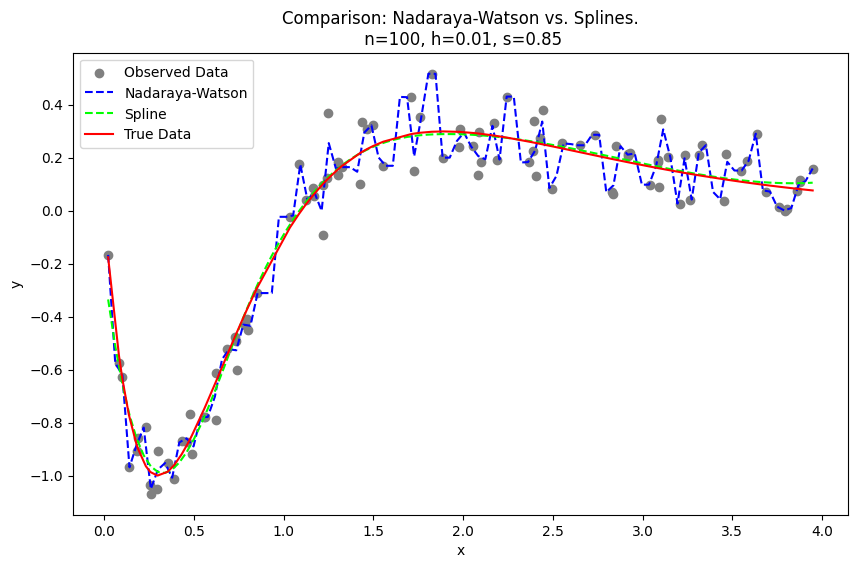

Nadaraya-Watson MSE: 0.0077
Spline MSE: 0.0004


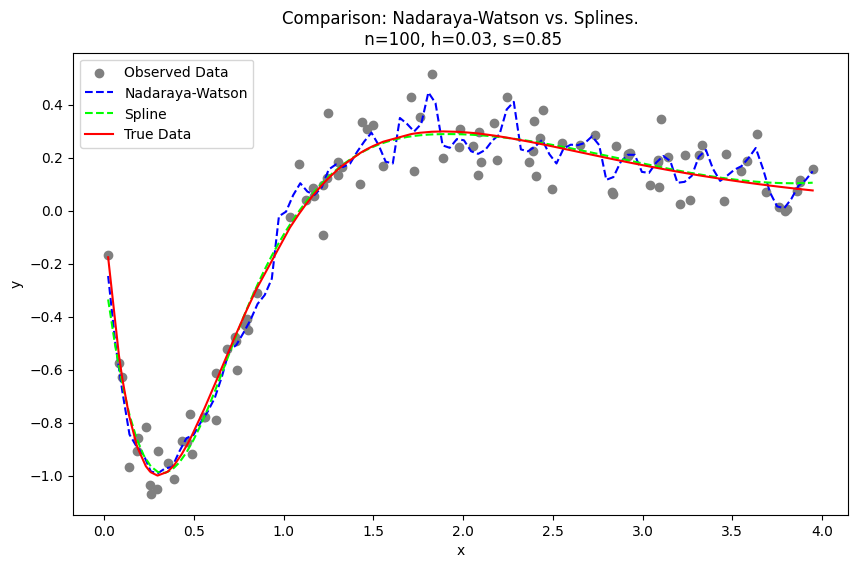

Nadaraya-Watson MSE: 0.0032
Spline MSE: 0.0004


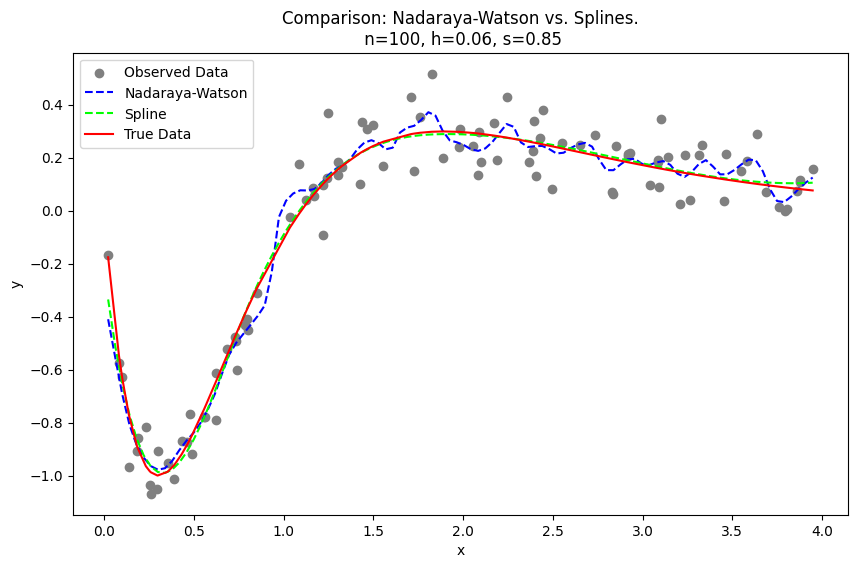

Nadaraya-Watson MSE: 0.0027
Spline MSE: 0.0004


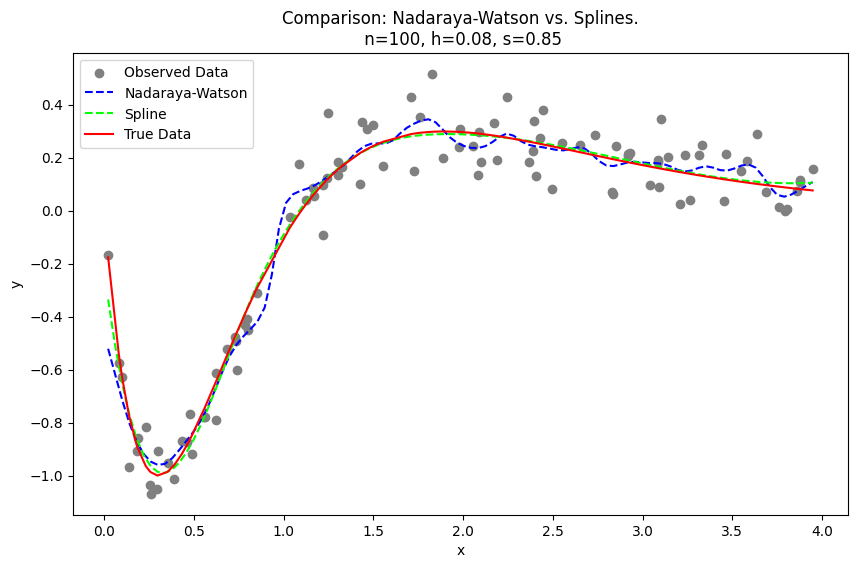

Nadaraya-Watson MSE: 0.0032
Spline MSE: 0.0004


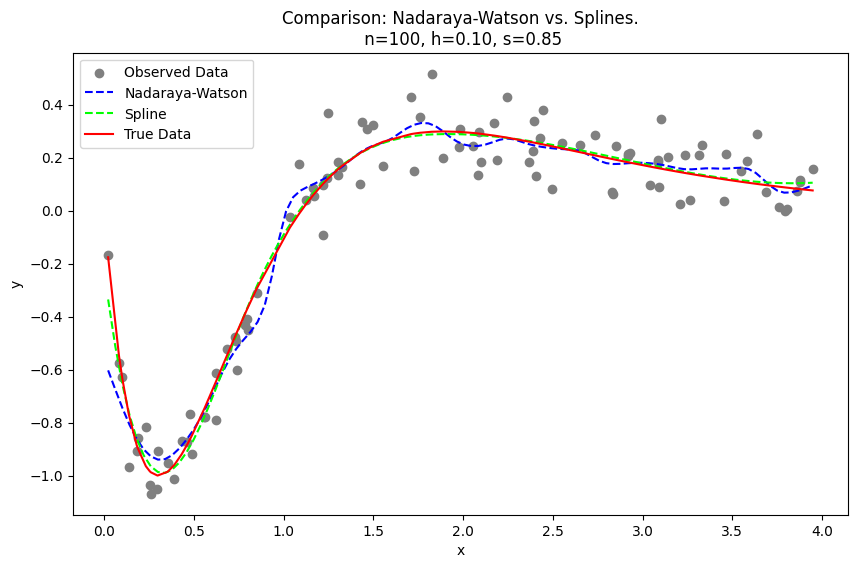

Nadaraya-Watson MSE: 0.0040
Spline MSE: 0.0004


In [2]:
mse_nws = []
mse_sps = []
h_range = np.linspace(0.01, 0.1, 41)
for i in range(41):
    mse_nw, mse_sp = run_plot_experiment(n=100, h=h_range[i], s=0.85, plot=i % 10 == 0)
    mse_nws.append(mse_nw)
    mse_sps.append(mse_sp)

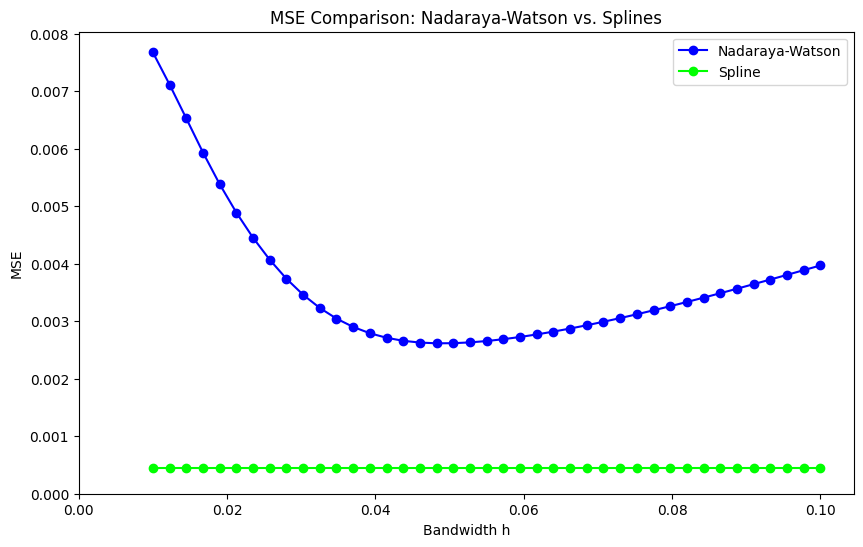

In [3]:
plot_mse(h_range, mse_nws, mse_sps)

# Experiment 2
## Compare NW_estimator and Splines with changing param s

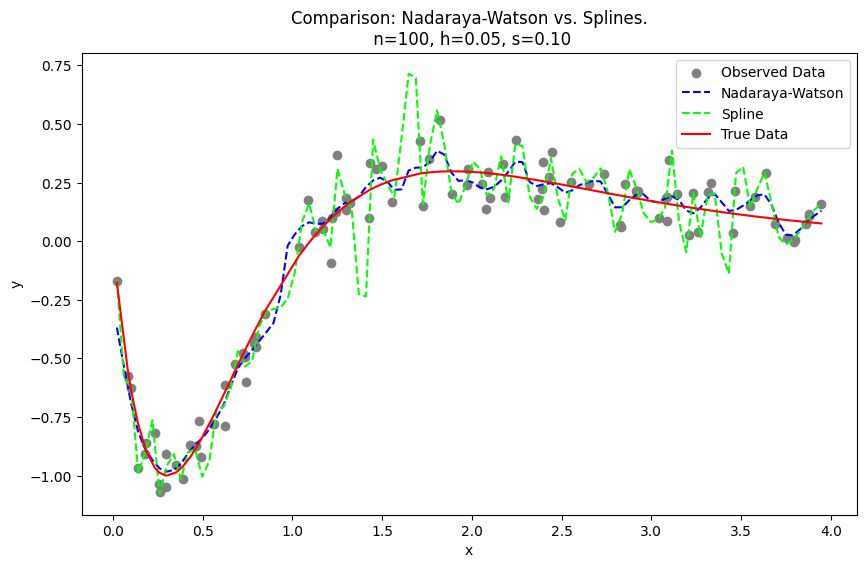

Nadaraya-Watson MSE: 0.0026
Spline MSE: 0.0189


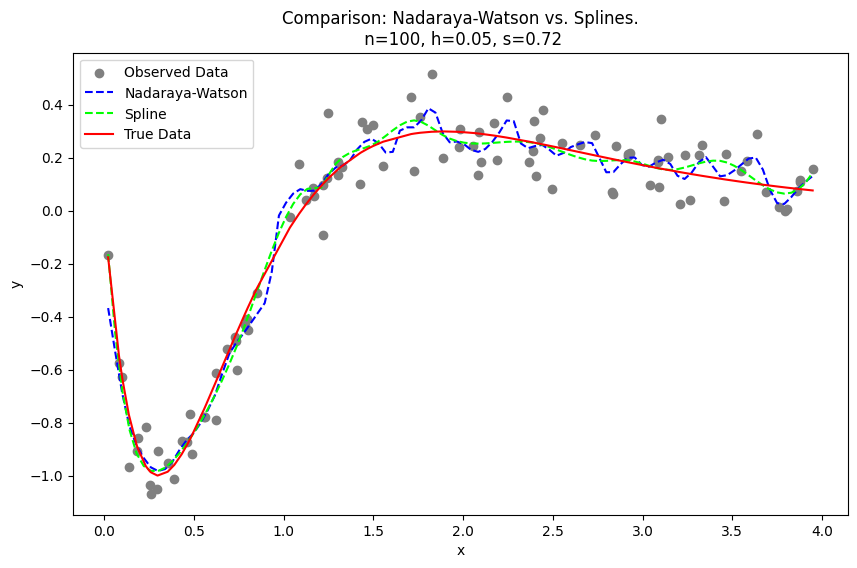

Nadaraya-Watson MSE: 0.0026
Spline MSE: 0.0010


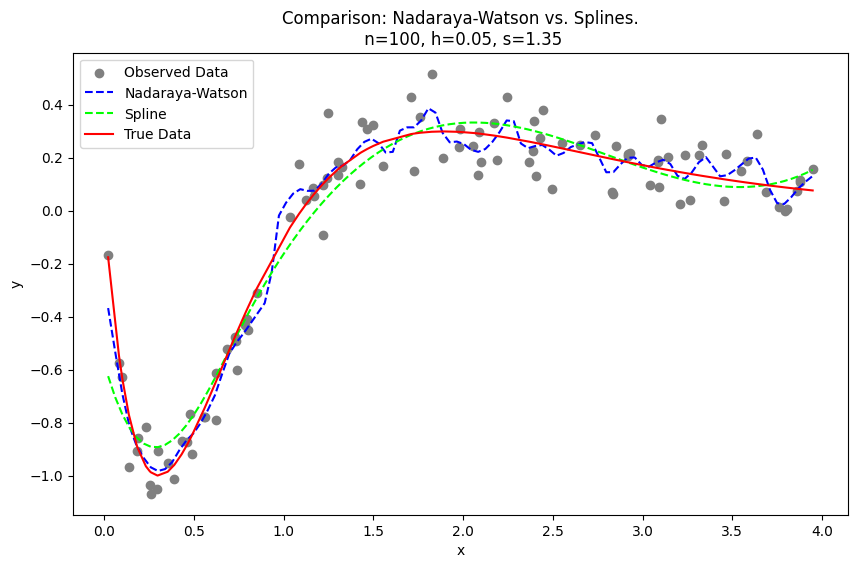

Nadaraya-Watson MSE: 0.0026
Spline MSE: 0.0048


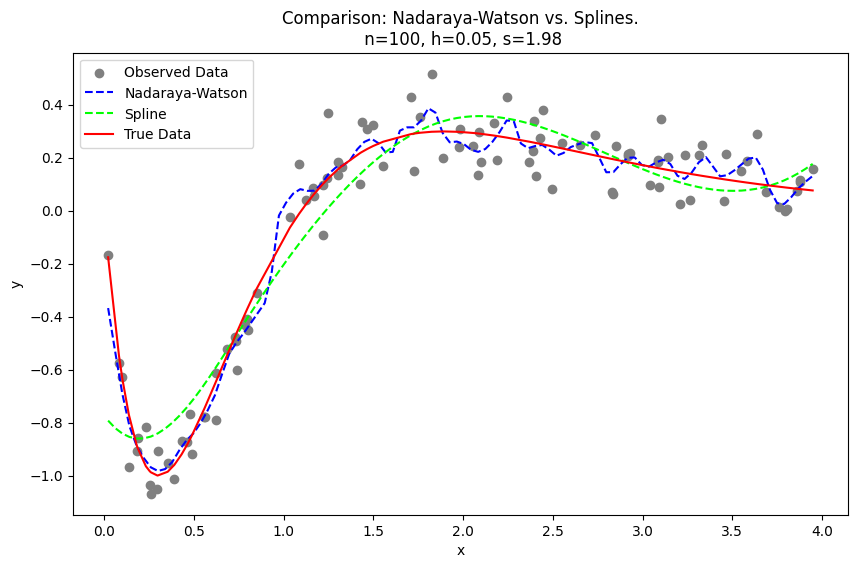

Nadaraya-Watson MSE: 0.0026
Spline MSE: 0.0106


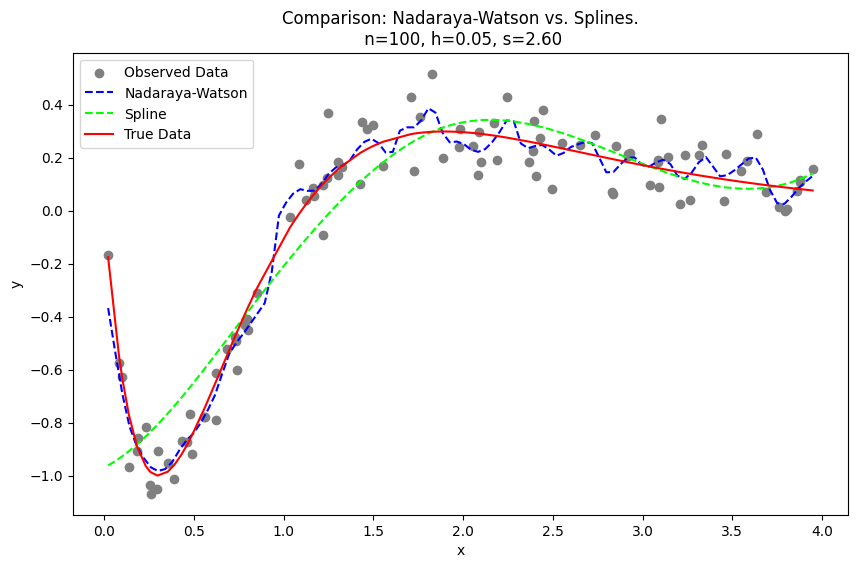

Nadaraya-Watson MSE: 0.0026
Spline MSE: 0.0166


In [4]:
h = h_range[np.argmin(mse_nws)]
mse_nws = []
mse_sps = []
s_range = np.linspace(0.1, 2.6, 41)
for i in range(41):
    mse_nw, mse_sp = run_plot_experiment(n=100, h=h, s=s_range[i], plot=i % 10 == 0)
    mse_nws.append(mse_nw)
    mse_sps.append(mse_sp)

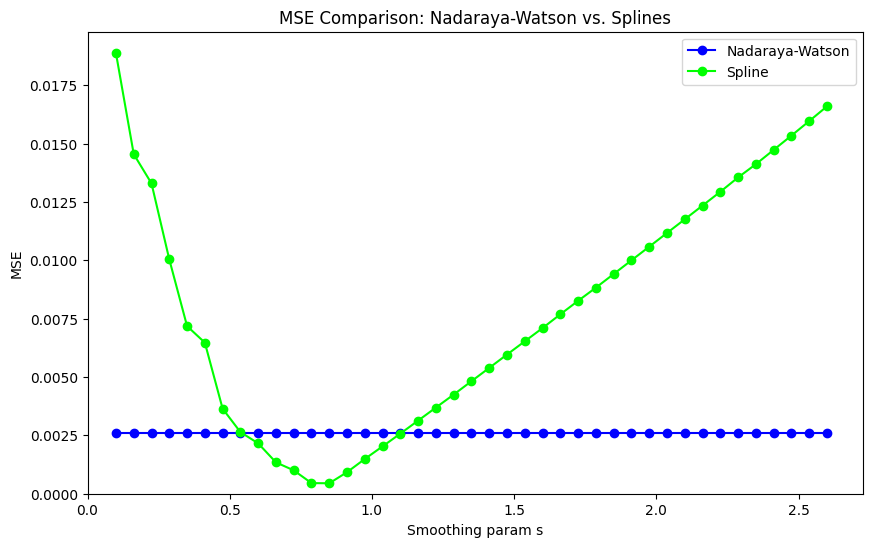

In [5]:
plot_mse(s_range, mse_nws, mse_sps, xlabel="Smoothing param s")

# Experiment 3
## Influence of sample size n on NW_estimator and Splines

  0%|          | 0/21 [00:00<?, ?it/s]

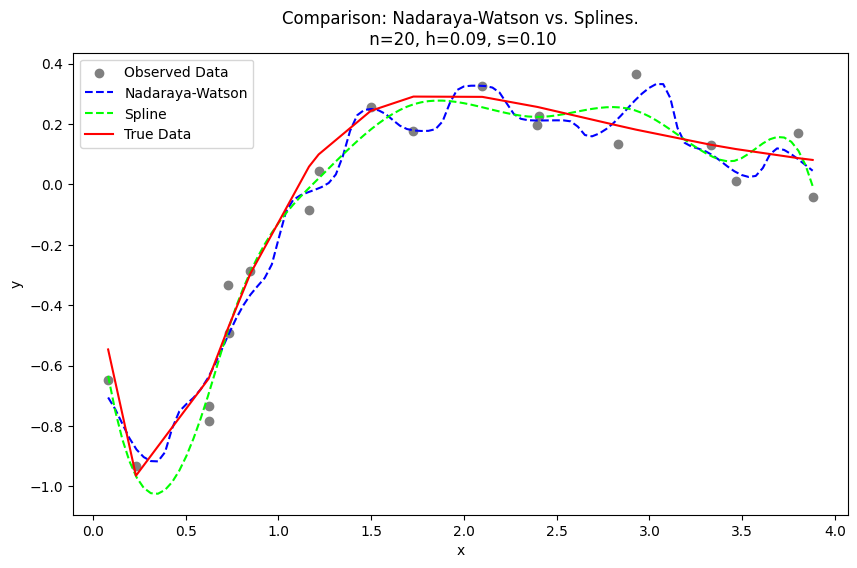

  5%|▍         | 1/21 [00:01<00:26,  1.34s/it]

Nadaraya-Watson MSE: 0.0052
Spline MSE: 0.0020


 24%|██▍       | 5/21 [00:15<00:55,  3.44s/it]

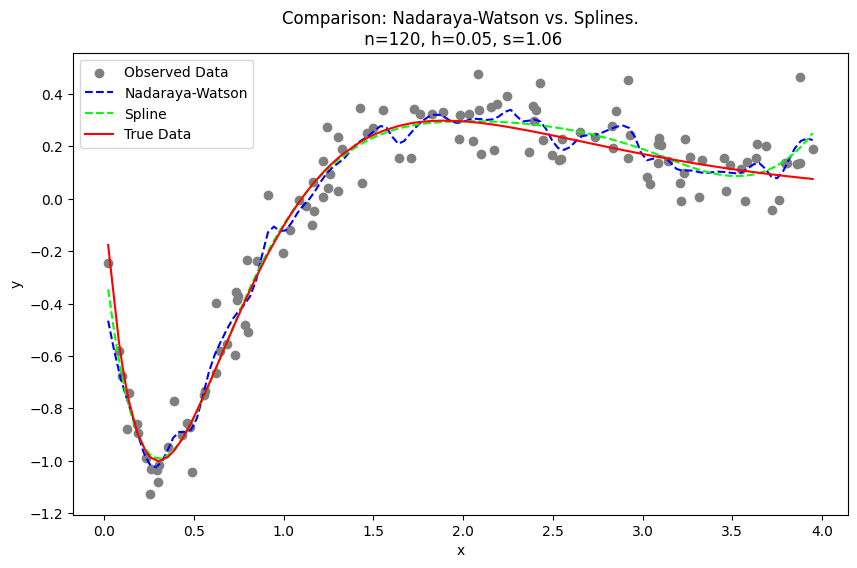

 29%|██▊       | 6/21 [00:21<01:06,  4.43s/it]

Nadaraya-Watson MSE: 0.0029
Spline MSE: 0.0013


 48%|████▊     | 10/21 [01:13<02:09, 11.80s/it]

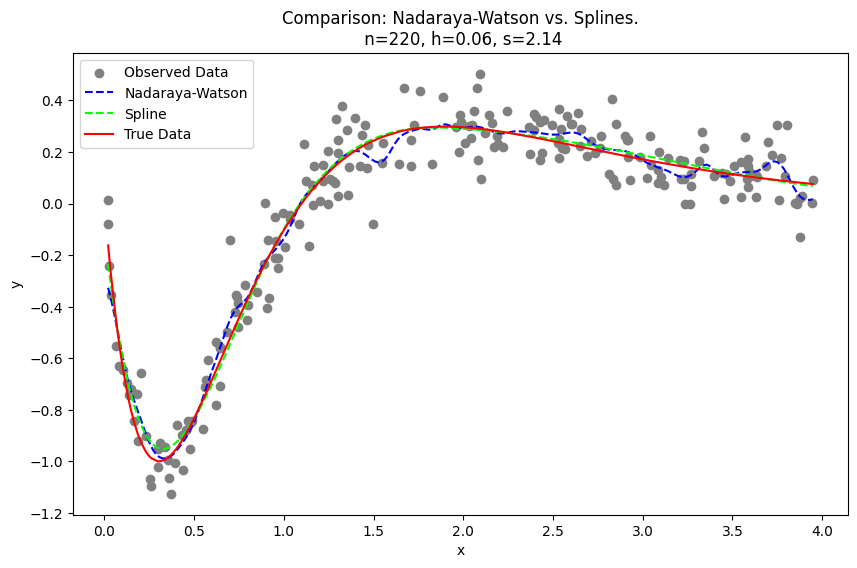

 52%|█████▏    | 11/21 [01:35<02:30, 15.09s/it]

Nadaraya-Watson MSE: 0.0013
Spline MSE: 0.0004


 71%|███████▏  | 15/21 [03:40<02:51, 28.60s/it]

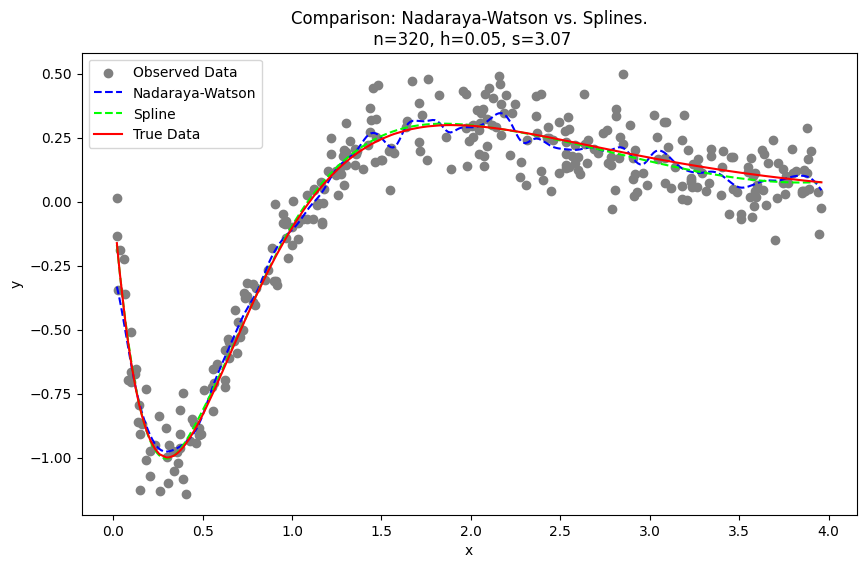

 76%|███████▌  | 16/21 [04:28<02:53, 34.60s/it]

Nadaraya-Watson MSE: 0.0008
Spline MSE: 0.0001


 95%|█████████▌| 20/21 [07:55<00:49, 49.63s/it]

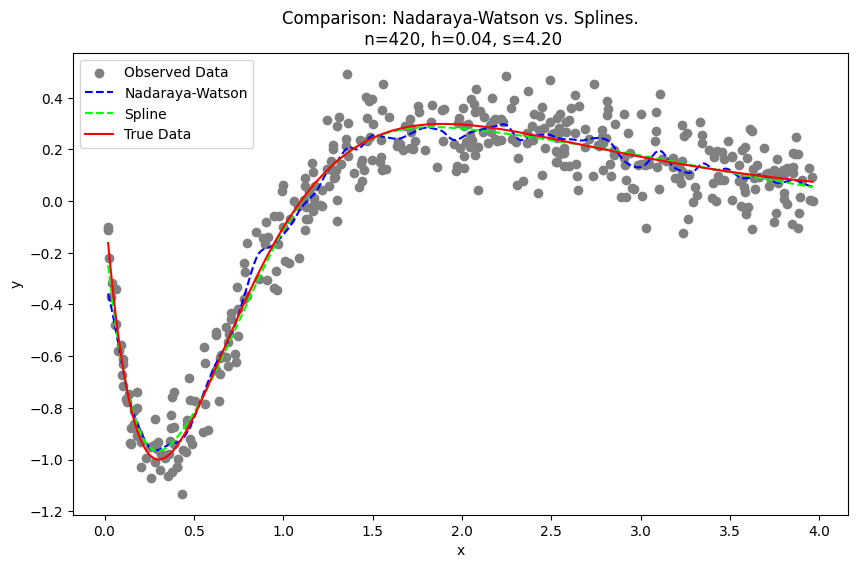

100%|██████████| 21/21 [09:02<00:00, 25.83s/it]

Nadaraya-Watson MSE: 0.0008
Spline MSE: 0.0002


In [6]:
from tqdm import tqdm

mse_nws = []
mse_sps = []
hs = []
ss = []
n_range = np.linspace(20, 420, 21)  #np.append(np.linspace(20, 200, 10), np.linspace(250, 1000, 11))
for i in tqdm(range(21)):
    n = int(n_range[i])
    h = find_best_bandwidth(n=n)
    s = find_best_smoothing(n=n)
    mse_nw, mse_sp = run_plot_experiment(n=n, h=h, s=s, plot=i % 5 == 0)
    mse_nws.append(mse_nw)
    mse_sps.append(mse_sp)
    hs.append(h)
    ss.append(s)

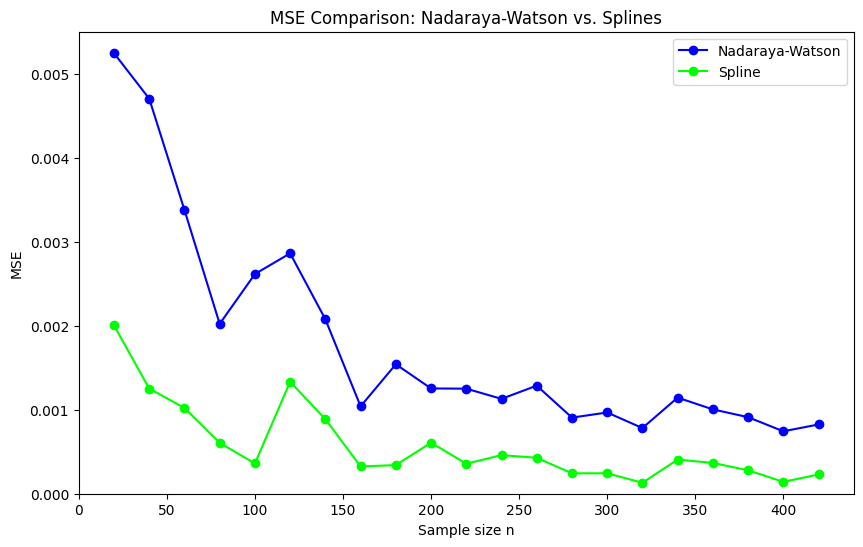

In [7]:
plot_mse(n_range, mse_nws, mse_sps, xlabel="Sample size n")

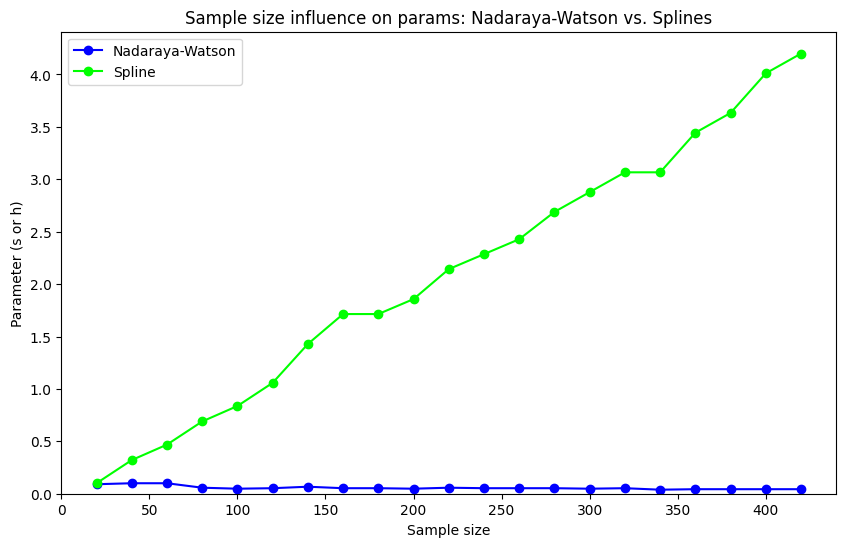

In [8]:
plot_params(n_range, hs, ss)